In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_162.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_68.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_69.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_126.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_23.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_150.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_120.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_26.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_116.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_141.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_98.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_73.csv
/kaggle/input/full-london-smart-meters/Small LCL Data/LCL-June2015v2_31.csv
/kaggl

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#!pip install -U pip
#!pip install -U setuptools wheel

!pip install autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.7/285.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB

Creat two load forecasts...
1) half-hourly load forecast for next 24 hours
2) peak half-hour in the next 24 hours

Value...
* For electric network operator, minimize the amount of spinning reserve

Data...
* residential smart meter usage data
* weather data
* weather forecast data

In [3]:
# load half-hourly electric usage data
# https://data.london.gov.uk/dataset/smartmeter-energy-use-data-in-london-households
d = pd.read_csv('/kaggle/input/small-lcl-data/LCL-June2015v2_99.csv', parse_dates=["DateTime"])

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   LCLid                    1000000 non-null  object        
 1   stdorToU                 1000000 non-null  object        
 2   DateTime                 1000000 non-null  datetime64[ns]
 3   KWH/hh (per half hour)   1000000 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 30.5+ MB


In [5]:
# convert usage to floats
# print(d.iloc[3])
d.iloc[:, 3] = pd.to_numeric(d.iloc[:, 3], errors='coerce')
# print(d.dtypes)

In [6]:
# set timestamp as the index
d.set_index('DateTime')
# sample.set_index('DateTime')

,LCLid,stdorToU,KWH/hh (per half hour)
DateTime,,,
2013-08-06 07:00:00,MAC004221,Std,0.046
2013-08-06 07:30:00,MAC004221,Std,0.040
2013-08-06 08:00:00,MAC004221,Std,0.016
2013-08-06 08:30:00,MAC004221,Std,0.018
2013-08-06 09:00:00,MAC004221,Std,0.016
...,...,...,...
2013-06-29 07:00:00,MAC004268,Std,0.151
2013-06-29 07:30:00,MAC004268,Std,0.278
2013-06-29 08:00:00,MAC004268,Std,0.128


In [7]:
# visualize and handle duplicates
# d = d.drop_duplicates()
print(d.groupby(d.columns.tolist(),as_index=False).size())
dupes = d[d.duplicated()]
print(dupes)
print(dupes.index)
d = d.drop(index=dupes.index)

d.info()

            LCLid stdorToU            DateTime  KWH/hh (per half hour)   size
0       MAC004221      Std 2013-08-06 07:00:00                    0.046     1
1       MAC004221      Std 2013-08-06 07:30:00                    0.040     1
2       MAC004221      Std 2013-08-06 08:00:00                    0.016     1
3       MAC004221      Std 2013-08-06 08:30:00                    0.018     1
4       MAC004221      Std 2013-08-06 09:00:00                    0.016     1
...           ...      ...                 ...                      ...   ...
999282  MAC004268      Std 2013-06-29 07:00:00                    0.151     1
999283  MAC004268      Std 2013-06-29 07:30:00                    0.278     1
999284  MAC004268      Std 2013-06-29 08:00:00                    0.128     1
999285  MAC004268      Std 2013-06-29 08:30:00                    0.049     1
999286  MAC004268      Std 2013-06-29 09:00:00                    0.129     1

[999287 rows x 5 columns]
            LCLid stdorToU   DateTime

In [8]:
d.set_index('DateTime')

,LCLid,stdorToU,KWH/hh (per half hour)
DateTime,,,
2013-08-06 07:00:00,MAC004221,Std,0.046
2013-08-06 07:30:00,MAC004221,Std,0.040
2013-08-06 08:00:00,MAC004221,Std,0.016
2013-08-06 08:30:00,MAC004221,Std,0.018
2013-08-06 09:00:00,MAC004221,Std,0.016
...,...,...,...
2013-06-29 07:00:00,MAC004268,Std,0.151
2013-06-29 07:30:00,MAC004268,Std,0.278
2013-06-29 08:00:00,MAC004268,Std,0.128


In [9]:
import seaborn as sns

          KWH/hh (per half hour)                                           \
DateTime      2012-05-23 10:30:00 2012-05-23 11:00:00 2012-05-23 11:30:00   
LCLid                                                                       
MAC004221                     NaN                 NaN                 NaN   
MAC004222                   0.382               0.311               0.212   
MAC004224                     NaN               0.213               0.458   
MAC004225                     NaN               0.112               0.113   
MAC004226                     NaN               0.163               0.035   
MAC004227                     NaN               0.347               0.241   
MAC004228                     NaN                 NaN               0.267   
MAC004230                     NaN                 NaN               0.241   
MAC004232                     NaN                 NaN                 NaN   
MAC004233                     NaN                 NaN                 NaN   

<Axes: xlabel='None-DateTime', ylabel='LCLid'>

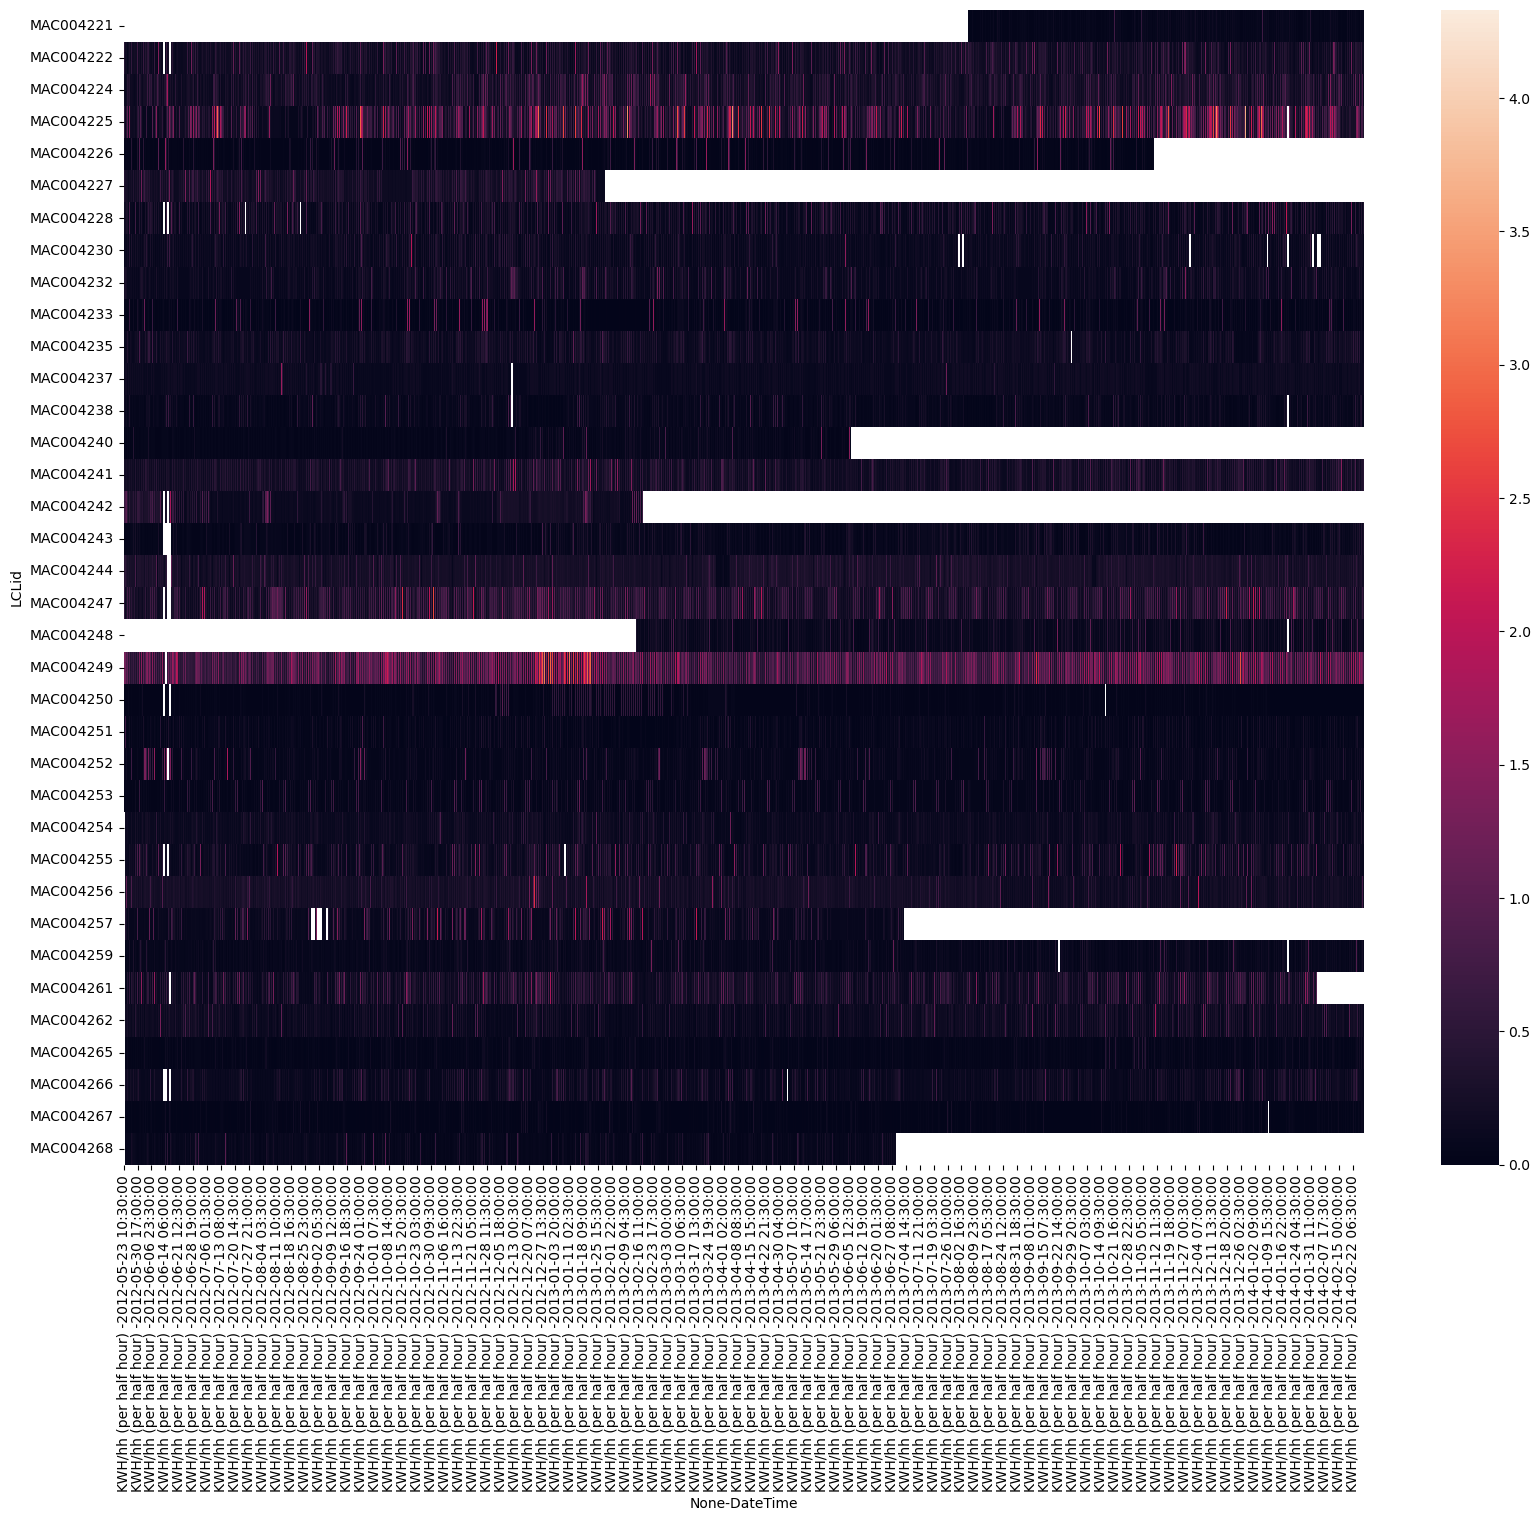

In [10]:
pivot_table = pd.pivot_table(d, columns='DateTime', index='LCLid')
print(pivot_table)
plt.subplots(figsize=(20,15))
sns.heatmap(pivot_table)


Observations from Heatmap...
* several houses start producing load part-way through the period
    - eg MAC004221, MAC004248
    
    
* several houses stop producing part-way through the period
    - eg MAC004226, MAC004257
    

* most houses have at least one "gap" in their data (visible as white lines)


* several houses stand out as having significantly higher average load than others
    - eg MAC004225, MAC004249

In [11]:
# visualize and handle outliers

# minumum and maximum timestamp for each house
print(d.groupby('LCLid').max()) 
print(d.groupby('LCLid').min())
print(d.groupby('LCLid').count())

print(d.groupby('LCLid').max().sort_values('DateTime'))
print(d.groupby('LCLid').min().sort_values('DateTime'))
print(d.groupby('LCLid').count().sort_values('DateTime'))

print(d.groupby('LCLid').agg(['min', 'max', 'count']))


          stdorToU            DateTime  KWH/hh (per half hour) 
LCLid                                                          
MAC004221      Std 2014-02-28 00:00:00                    1.005
MAC004222      Std 2014-02-28 00:00:00                    2.562
MAC004224      Std 2014-02-28 00:00:00                    4.329
MAC004225      Std 2014-02-28 00:00:00                    4.330
MAC004226      Std 2013-11-11 00:00:00                    3.095
MAC004227      Std 2013-01-29 00:00:00                    2.430
MAC004228      Std 2014-02-28 00:00:00                    3.271
MAC004230      Std 2014-02-28 00:00:00                    1.933
MAC004232      Std 2014-02-28 00:00:00                    1.854
MAC004233      Std 2014-02-28 00:00:00                    1.651
MAC004235      Std 2014-02-28 00:00:00                    1.255
MAC004237      Std 2014-02-28 00:00:00                    1.733
MAC004238      Std 2014-02-28 00:00:00                    1.638
MAC004240      Std 2013-06-05 23:30:00  

In [12]:
# which house has the highest peak load?

# which house has the highest total aggregate load?

# how variable / predictable is the timing of the peak load

# how accurate is the next 24 hours forecast profile overall?

# how accurate is the peak load forecast in next 24 hours?

# normalize and standardize


In [13]:
# extract one smartmeter for plotting
sample = d.query("LCLid == 'MAC004225'")
sample

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
71793,MAC004225,Std,2012-05-23 11:00:00,0.112
71794,MAC004225,Std,2012-05-23 11:30:00,0.113
71795,MAC004225,Std,2012-05-23 12:00:00,0.205
71796,MAC004225,Std,2012-05-23 12:30:00,0.131
71797,MAC004225,Std,2012-05-23 13:00:00,0.140
...,...,...,...,...
102747,MAC004225,Std,2014-02-27 22:00:00,1.341
102748,MAC004225,Std,2014-02-27 22:30:00,0.172
102749,MAC004225,Std,2014-02-27 23:00:00,0.161
102750,MAC004225,Std,2014-02-27 23:30:00,0.120


In [14]:
sample.iloc[:,3]
sample.iloc[:,2]

71793    2012-05-23 11:00:00
71794    2012-05-23 11:30:00
71795    2012-05-23 12:00:00
71796    2012-05-23 12:30:00
71797    2012-05-23 13:00:00
                 ...        
102747   2014-02-27 22:00:00
102748   2014-02-27 22:30:00
102749   2014-02-27 23:00:00
102750   2014-02-27 23:30:00
102751   2014-02-28 00:00:00
Name: DateTime, Length: 30939, dtype: datetime64[ns]

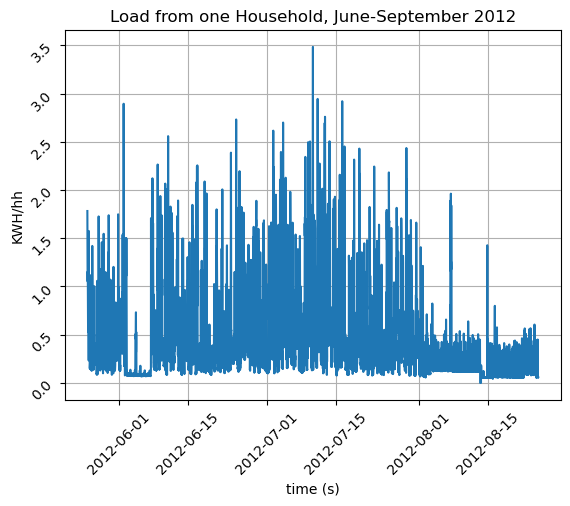

In [15]:
# Visualize load profile for one household meter
fig, ax = plt.subplots()
ax.plot(sample.iloc[100:4500,2], sample.iloc[100:4500,3])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Load from one Household, June-September 2012')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

In [16]:
sample.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
71793,MAC004225,Std,2012-05-23 11:00:00,0.112
71794,MAC004225,Std,2012-05-23 11:30:00,0.113
71795,MAC004225,Std,2012-05-23 12:00:00,0.205
71796,MAC004225,Std,2012-05-23 12:30:00,0.131
71797,MAC004225,Std,2012-05-23 13:00:00,0.140


In [17]:
sample.DateTime.dtype
sample.set_index('DateTime')

,LCLid,stdorToU,KWH/hh (per half hour)
DateTime,,,
2012-05-23 11:00:00,MAC004225,Std,0.112
2012-05-23 11:30:00,MAC004225,Std,0.113
2012-05-23 12:00:00,MAC004225,Std,0.205
2012-05-23 12:30:00,MAC004225,Std,0.131
2012-05-23 13:00:00,MAC004225,Std,0.140
...,...,...,...
2014-02-27 22:00:00,MAC004225,Std,1.341
2014-02-27 22:30:00,MAC004225,Std,0.172
2014-02-27 23:00:00,MAC004225,Std,0.161


In [18]:
# calculate sum of all loads
aggLoad = pd.DataFrame(columns=['DateTime', 'AggregateLoad'])
limit = 100
counter = 1
reportFreq = 1000
nUniqueTstamps = d.DateTime.unique().size
for tstamp in d.DateTime.unique():
    # print('tstamp: ', tstamp)
    tstampSum = d.loc[d['DateTime'] == tstamp].iloc[:,3].sum()
    row = {
    "DateTime": tstamp,
    "AggregateLoad": tstampSum
    }
    # print(row)
    # aggLoad = aggLoad.append(row, ignore_index=True)
    # Create an index for the DataFrame
    # index = pd.Index([1])
    index = pd.Index([1])
    
    # Create the DataFrame
    row_df = pd.DataFrame(row, index=index)

    # Concatenate `row_df` to `aggLoad`
    aggLoad = pd.concat([aggLoad, row_df], ignore_index=True)
    
    counter += 1
    
    if counter % reportFreq == 0:
        print('Progress: ', (counter / nUniqueTstamps)*100)
    
aggLoad

Progress:  3.2263268269075653
Progress:  6.452653653815131
Progress:  9.678980480722696
Progress:  12.905307307630261
Progress:  16.13163413453783
Progress:  19.357960961445393
Progress:  22.58428778835296
Progress:  25.810614615260523
Progress:  29.03694144216809
Progress:  32.26326826907566
Progress:  35.489595095983226
Progress:  38.715921922890786
Progress:  41.94224874979835
Progress:  45.16857557670592
Progress:  48.394902403613486
Progress:  51.621229230521045
Progress:  54.84755605742861
Progress:  58.07388288433618
Progress:  61.300209711243745
Progress:  64.52653653815132
Progress:  67.75286336505889
Progress:  70.97919019196645
Progress:  74.20551701887402
Progress:  77.43184384578157
Progress:  80.65817067268914
Progress:  83.8844974995967
Progress:  87.11082432650427
Progress:  90.33715115341184
Progress:  93.5634779803194
Progress:  96.78980480722697


,DateTime,AggregateLoad
0,2013-08-06 07:00:00,4.172
1,2013-08-06 07:30:00,4.793
2,2013-08-06 08:00:00,6.773
3,2013-08-06 08:30:00,5.659
4,2013-08-06 09:00:00,5.272
...,...,...
30990,2012-12-18 15:20:01,0.000
30991,2012-12-18 15:20:02,0.000
30992,2013-02-06 18:22:38,0.000
30993,2012-12-18 15:20:03,0.000


In [19]:
aggLoad = aggLoad.sort_values(by=['DateTime'])
aggLoad = aggLoad.set_index('DateTime')
aggLoad.index.rename('DateTimeIndex', inplace=True)
aggLoad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30995 entries, 2012-05-23 10:30:00 to 2014-02-28 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AggregateLoad  30995 non-null  float64
dtypes: float64(1)
memory usage: 484.3 KB


In [20]:
aggLoad['DateTime'] = aggLoad.index
aggLoad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30995 entries, 2012-05-23 10:30:00 to 2014-02-28 00:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AggregateLoad  30995 non-null  float64       
 1   DateTime       30995 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 726.4 KB


In [21]:
# inspect and fix records with zero load
# start with the aggregated records with zero load
AggZeros = aggLoad.query("AggregateLoad == 0")
AggZeros



,AggregateLoad,DateTime
DateTimeIndex,,
2012-12-18 15:19:59,0.0,2012-12-18 15:19:59
2012-12-18 15:20:00,0.0,2012-12-18 15:20:00
2012-12-18 15:20:01,0.0,2012-12-18 15:20:01
2012-12-18 15:20:02,0.0,2012-12-18 15:20:02
2012-12-18 15:20:03,0.0,2012-12-18 15:20:03
2012-12-18 15:20:04,0.0,2012-12-18 15:20:04
2013-02-06 18:22:38,0.0,2013-02-06 18:22:38


Observation: Some of the timestamps are not exactly on the half-hour
Question: How many of the timestamps are not exactly on the half-hour?

In [22]:
# inspect and fix records with zero load
# look at the raw records with zero load
# RawZeros = d.query("'KWH/hh (per half hour)' == 0")
# RawZeros

In [23]:
# inspect and fix records not exactly on the half-hour
offRecs = aggLoad.query("DateTime.dt.minute not in (0,30) or DateTime.dt.second != 0")
# aggLoad["DateTime"].dt.hour > 30
print('Records not exactly on the half-hour: ', offRecs)
print(offRecs.info())

# delete records not exactly on the half-hour
aggLoad = aggLoad.drop(offRecs.index)

offRecs = aggLoad.query("DateTime.dt.minute not in (0,30) or DateTime.dt.second != 0")
print('Records not exactly on the half-hour: ', offRecs)

Records not exactly on the half-hour:                       AggregateLoad            DateTime
DateTimeIndex                                         
2012-12-18 15:19:59            0.0 2012-12-18 15:19:59
2012-12-18 15:20:00            0.0 2012-12-18 15:20:00
2012-12-18 15:20:01            0.0 2012-12-18 15:20:01
2012-12-18 15:20:02            0.0 2012-12-18 15:20:02
2012-12-18 15:20:03            0.0 2012-12-18 15:20:03
2012-12-18 15:20:04            0.0 2012-12-18 15:20:04
2013-02-06 18:22:38            0.0 2013-02-06 18:22:38
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2012-12-18 15:19:59 to 2013-02-06 18:22:38
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AggregateLoad  7 non-null      float64       
 1   DateTime       7 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.0 bytes
None
Records not exactly on the half-hour:  Empty DataFrame

In [24]:
# check for missing records in the aggregate load time series
# create reference time series
minTimestamp = aggLoad.index.min()
maxTimestamp = aggLoad.index.max()

print('minTimestamp: ', minTimestamp)
print('maxTimestamp: ', maxTimestamp)

date_range = pd.date_range(minTimestamp, maxTimestamp, freq='30Min')
reference_df = pd.DataFrame(np.random.randint(1, 20, (date_range.shape[0], 1)))
reference_df.index = date_range  # set index

print('reference index length: ', reference_df.shape)
print('aggLoad index length: ', aggLoad.shape)

print('reference_df: ', reference_df)
print('aggLoad: ', aggLoad)

print('reference index: ', reference_df.index)
print('aggLoad index: ', aggLoad.index)

# check for missing datetimeindex values based on reference index (with all values)
missing_dates = reference_df.index[~reference_df.index.isin(aggLoad.index)]

print('missing_dates: ', missing_dates)

minTimestamp:  2012-05-23 10:30:00
maxTimestamp:  2014-02-28 00:00:00
reference index length:  (30988, 1)
aggLoad index length:  (30988, 2)
reference_df:                        0
2012-05-23 10:30:00  10
2012-05-23 11:00:00  11
2012-05-23 11:30:00  17
2012-05-23 12:00:00  17
2012-05-23 12:30:00  12
...                  ..
2014-02-27 22:00:00  12
2014-02-27 22:30:00  17
2014-02-27 23:00:00  12
2014-02-27 23:30:00   6
2014-02-28 00:00:00   8

[30988 rows x 1 columns]
aggLoad:                       AggregateLoad            DateTime
DateTimeIndex                                         
2012-05-23 10:30:00          0.382 2012-05-23 10:30:00
2012-05-23 11:00:00          1.146 2012-05-23 11:00:00
2012-05-23 11:30:00          1.567 2012-05-23 11:30:00
2012-05-23 12:00:00          3.183 2012-05-23 12:00:00
2012-05-23 12:30:00          2.988 2012-05-23 12:30:00
...                            ...                 ...
2014-02-27 22:00:00          8.790 2014-02-27 22:00:00
2014-02-27 22:30:00       

                     AggregateLoad            DateTime
DateTimeIndex                                         
2012-05-23 10:30:00          0.382 2012-05-23 10:30:00
2012-05-23 11:00:00          1.146 2012-05-23 11:00:00
2012-05-23 11:30:00          1.567 2012-05-23 11:30:00
2012-05-23 12:00:00          3.183 2012-05-23 12:00:00
2012-05-23 12:30:00          2.988 2012-05-23 12:30:00
...                            ...                 ...
2014-02-27 22:00:00          8.790 2014-02-27 22:00:00
2014-02-27 22:30:00          7.083 2014-02-27 22:30:00
2014-02-27 23:00:00          6.616 2014-02-27 23:00:00
2014-02-27 23:30:00          5.552 2014-02-27 23:30:00
2014-02-28 00:00:00          4.845 2014-02-28 00:00:00

[30988 rows x 2 columns]


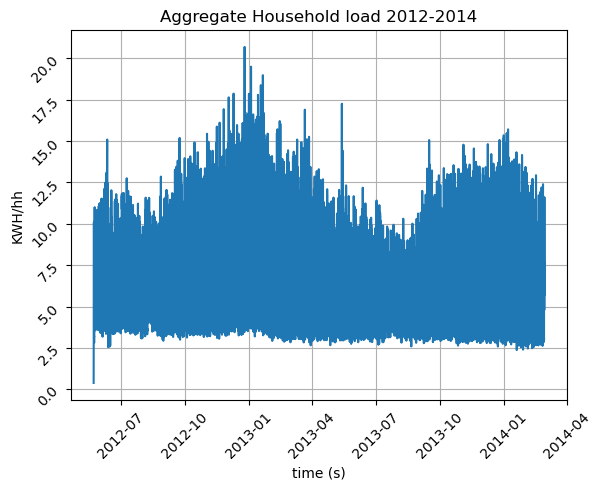

In [25]:
print(aggLoad)

fig, ax = plt.subplots()
ax.plot(aggLoad.DateTime, aggLoad.AggregateLoad)

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load 2012-2014')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

In [26]:
aggLoad.head()


,AggregateLoad,DateTime
DateTimeIndex,,
2012-05-23 10:30:00,0.382,2012-05-23 10:30:00
2012-05-23 11:00:00,1.146,2012-05-23 11:00:00
2012-05-23 11:30:00,1.567,2012-05-23 11:30:00
2012-05-23 12:00:00,3.183,2012-05-23 12:00:00
2012-05-23 12:30:00,2.988,2012-05-23 12:30:00


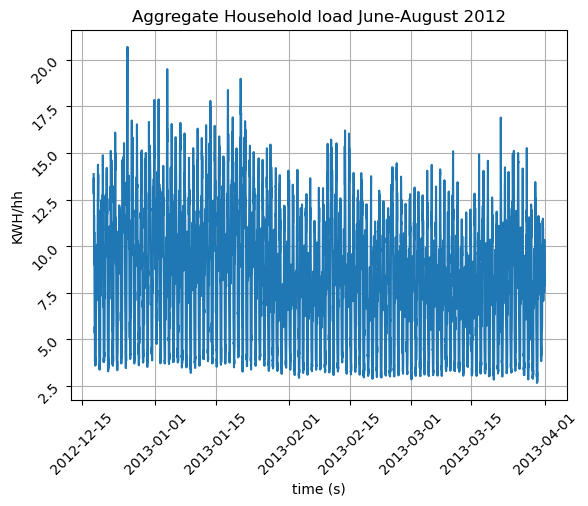

In [27]:
fig, ax = plt.subplots()
ax.plot(aggLoad.DateTime[10000:15000], aggLoad.AggregateLoad[10000:15000])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load June-August 2012')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

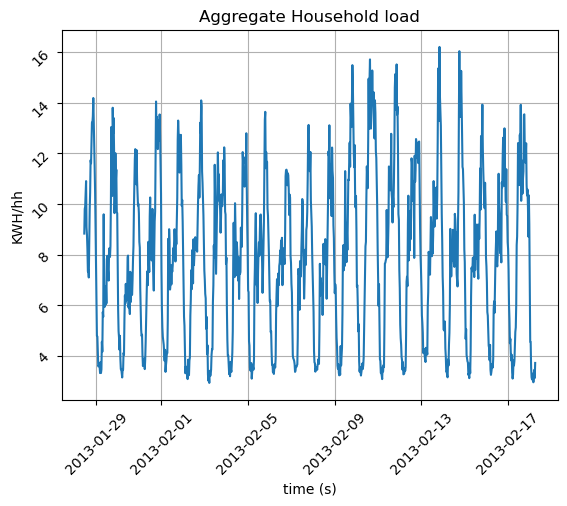

In [28]:
fig, ax = plt.subplots()
ax.plot(aggLoad.DateTime[12000:13000], aggLoad.AggregateLoad[12000:13000])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

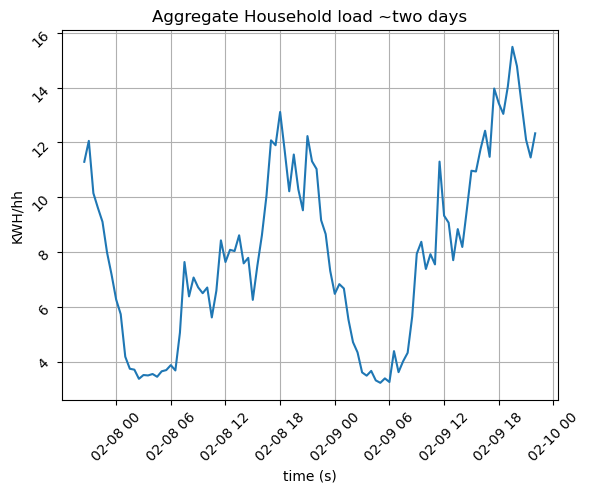

In [29]:
fig, ax = plt.subplots()
ax.plot(aggLoad.DateTime[12500:12600], aggLoad.AggregateLoad[12500:12600])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load ~two days')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

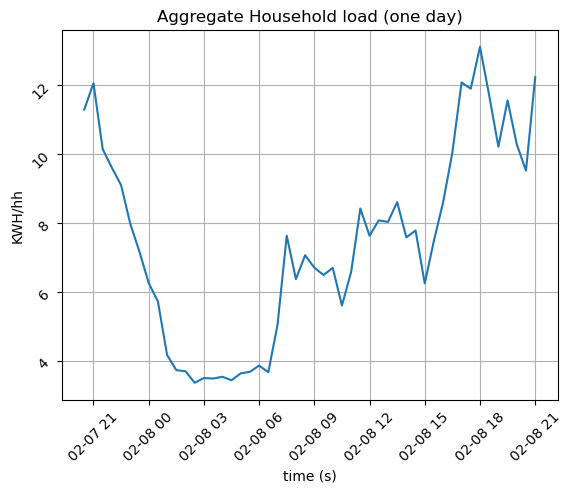

In [30]:
fig, ax = plt.subplots()
ax.plot(aggLoad.DateTime[12500:12550], aggLoad.AggregateLoad[12500:12550])

ax.set(xlabel='time (s)', ylabel='KWH/hh',
       title='Aggregate Household load (one day)')
plt.tick_params(rotation=45)
ax.grid()

fig.savefig("test.png")
plt.show()

Create a Deep Learning time series forecasting model using Keras

In [31]:
import tensorflow as tf
from tensorflow import keras


In [32]:
# RNN

In [33]:
# LSTM

In [34]:
# CNN-LSTM

AutoGluon TimeSeries Sample

In [35]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [36]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
df.head()

,item_id,timestamp,target
0,H1,1750-01-01 00:00:00,605.0
1,H1,1750-01-01 01:00:00,586.0
2,H1,1750-01-01 02:00:00,586.0
3,H1,1750-01-01 03:00:00,559.0
4,H1,1750-01-01 04:00:00,511.0


In [37]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
train_data.head()

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0

In [38]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="autogluon-m4-hourly",
    target="target",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: medium_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MASE',
 'excluded_model_types': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'medium_quality',
 'num_val_windows': 1,
 'prediction_length': 48,
 'random_seed': None,
 'target': 'target',
 'time_limit': 600,
 'verbosity': 2}
Provided training data set with 148060 rows, 200 items (item = single time series). Average time series length is 740.3. Data frequency is 'H'.
AutoGluon will save models to autogluon-m4-hourly/
AutoGluon will gauge predictive performance using evaluation metric: 'MASE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'target'

Starting training. Start time is 2023-08-30 00:16:23
Models that will be 

In [39]:
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: RecursiveTabular


mean         0.1         0.2         0.3  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  621.022377  591.515051  601.644310  608.948218   
        1750-01-30 05:00:00  555.173747  513.444087  527.769022  538.098308   
        1750-01-30 06:00:00  512.971912  461.863725  479.408116  492.058856   
        1750-01-30 07:00:00  478.888969  419.874318  440.132836  454.740653   
        1750-01-30 08:00:00  456.222546  390.242160  412.891872  429.223907   

                                    0.4         0.5         0.6         0.7  \
item_id timestamp                                                             
H1      1750-01-30 04:00:00  615.189139  621.022377  626.855615  633.096535   
        1750-01-30 05:00:00  546.924302  555.173747  563.423191  572.249185   
        1750-01-30 06:00:00  502.868447  512.971912  523.075377  533.884968   
        1750-01-30 07:00:00  467.222493  478.888969  490.555446  503.037286   
        1750-01-30 08:00:00  443.179029  456.222546  469.266063  483.221185   

                                    0.8         0.9  
item_id timestamp                                    
H1      1750-01-30 04:00:00  640.400443  650.529702  
        1750-01-30 05:00:00  582.578471  596.903406  
        1750-01-30 06:00:00  546.535708  564.080099  
        1750-01-30 07:00:00  517.645103  537.903620  
        1750-01-30 08:00:00  499.553220  522.202931

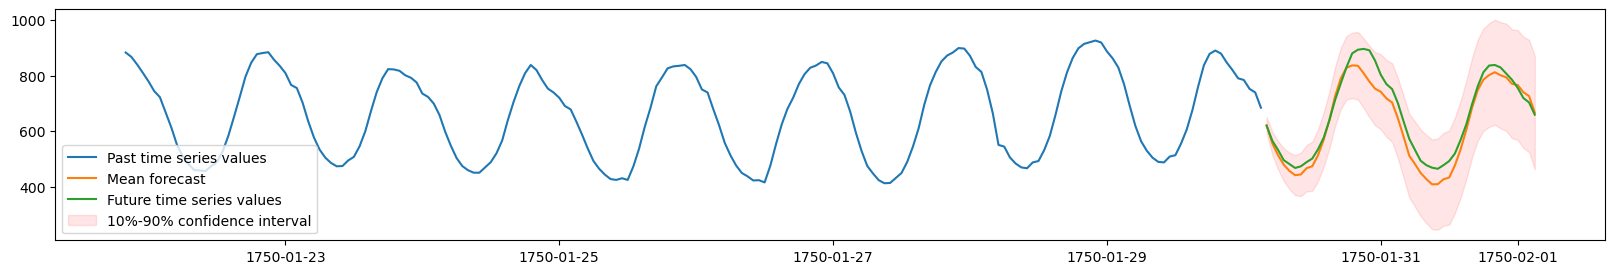

In [40]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

plt.figure(figsize=(20, 3))

item_id = "H1"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][-48:]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [41]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,RecursiveTabular,-0.870271,-0.898770,2.610031,3.328641,40.636516,5
1,SeasonalNaive,-1.022854,-1.216909,11.473785,0.401957,0.157902,2
2,DeepAR,-1.541915,-1.634858,15.001207,15.577377,358.790681,6
3,AutoETS,-1.778531,-1.939939,149.772368,141.772678,0.169562,4
4,Theta,-1.905365,-2.142531,37.329756,41.329916,0.165177,3
5,Naive,-6.696079,-6.662942,0.427457,12.149474,0.166723,1


AutoGluon with our dataset

In [42]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor


In [43]:
aggLoad.head()

,AggregateLoad,DateTime
DateTimeIndex,,
2012-05-23 10:30:00,0.382,2012-05-23 10:30:00
2012-05-23 11:00:00,1.146,2012-05-23 11:00:00
2012-05-23 11:30:00,1.567,2012-05-23 11:30:00
2012-05-23 12:00:00,3.183,2012-05-23 12:00:00
2012-05-23 12:30:00,2.988,2012-05-23 12:30:00


In [44]:
profile = ProfileReport(d, tsmode=True, sortby="DateTime")
profile.to_file('profile_report.html')
profile

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508 in run_code        │
│                                                                                                  │
│   3505 │   │   │   │   if async_:                                                                │
│   3506 │   │   │   │   │   await eval(code_obj, self.user_global_ns, self.user_ns)               │
│   3507 │   │   │   │   else:                                                                     │
│ ❱ 3508 │   │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                     │
│   3509 │   │   │   finally:                                                                      │
│   3510 │   │   │   │   # Reset our crash handler in place                                        │
│   3511 │   │   │   │   sys.excepthook = old_excepthook                                           │
│                                                                                                  │
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 profile = ProfileReport(d, tsmode=True, sortby="DateTime")                                   │
│   2 profile.to_file('profile_report.html')                                                       │
│   3 profile                                                                                      │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'ProfileReport' is not defined

In [ ]:
# AutoGluon requires and ItemID Column, so adding one...
aggLoad['item_id'] = 'LoadSum'
aggLoad = aggLoad.astype({"item_id": str})

# Split the time series data into train, test, and validation datasets
train_size = int(len(aggLoad) * 0.8)  # 70% for training
test_size = int(len(aggLoad) * 0.1)   # 20% for testing
val_size = len(aggLoad) - train_size - test_size  # Remaining for validation

train_data = aggLoad[:train_size]
test_data = aggLoad[train_size:train_size+test_size]
val_data = aggLoad[train_size+test_size:]

print('train_data.head()', train_data.head())
print('test_data.head()', test_data.head())
print('val_data.head()', val_data.head())
print(train_data.info())



In [ ]:
# check the regularity of the observations (time between observations)
# print(pd.infer_freq(train_data.DateTime))
aggLoad.index.to_series().diff().value_counts()

In [ ]:
print(train_data.info())
train_data_tsdf = TimeSeriesDataFrame.from_data_frame(
    train_data,
    id_column="item_id",
    timestamp_column="DateTime"
)
train_data_tsdf

In [ ]:
test_data_tsdf = TimeSeriesDataFrame.from_data_frame(
    test_data,
    id_column="item_id",
    timestamp_column="DateTime"
)
test_data_tsdf

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="autogluon-m4-hourly",
    target="AggregateLoad",
    eval_metric="MASE",
)

predictor.fit(
    train_data_tsdf,
    presets="high_quality",
    time_limit=6000,
)

In [ ]:
# The test score is computed using the last
# prediction_length=48 timesteps of each time series in test_data
predictor.leaderboard(test_data_tsdf, silent=True)

In [ ]:
predictions = predictor.predict(train_data_tsdf)
predictions.head()

In [ ]:
plt.figure(figsize=(20, 3))

item_id = "LoadSum"
y_past = train_data_tsdf.loc[item_id]["AggregateLoad"]
y_pred = predictions.loc[item_id]
y_test = test_data_tsdf.loc[item_id]["AggregateLoad"]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test[:48], label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();